In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn
from sklearn.utils import resample

In [ ]:
import lazypredict
from sklearn.model_selection import train_test_split

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
!pwd
import os
os.chdir("/Users/sophiatannir/Documents/Vanderbilt_DSI/Spring2023/Data Science Teams/sp23-ancient-artifacts-team8")

/Users/sophiatannir/Documents/Vanderbilt_DSI/Spring2023/Data Science Teams/sp23-ancient-artifacts-team8/3_model_training


In [ ]:
master_micro = pd.read_csv("0_data/master.csv")

In [ ]:
master_micro.head()

,Unnamed: 0,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,...,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,0,104,10708,30.89,38.25,36.88,46.82,10.18,44.17,10.10,...,0.28,3211.66,23.53,19.39,4.37,49.77,22.82,0.21,unknown,lithic
1,1,19,5682,27.73,33.38,35.15,40.00,9.03,39.02,7.98,...,0.26,2547.28,22.09,20.69,4.89,37.45,5.13,0.21,unknown,lithic
2,2,14,4826,26.73,36.06,30.20,46.33,8.03,47.37,7.75,...,0.27,2571.50,19.11,21.25,6.11,52.38,17.38,0.22,unknown,lithic
3,3,1,2812,24.41,36.20,25.04,57.35,5.09,50.54,4.90,...,0.20,2001.16,15.06,18.23,10.30,51.47,17.10,0.25,unknown,lithic
4,4,83,9441,22.87,29.39,24.04,39.82,4.39,38.57,3.95,...,0.18,1745.24,14.22,17.09,9.77,36.43,3.13,0.28,unknown,lithic


In [ ]:
master_micro.size_micro.value_counts()

0.125mm    170885
0.25mm     115876
0.5mm      103144
unknown     78612
1mm         10191
2mm          4340
4mm           605
Name: size_micro, dtype: int64

In [ ]:
master_micro.type_micro.value_counts()

soil      478354
lithic      5299
Name: type_micro, dtype: int64

In [ ]:
sub_micro = master_micro[(master_micro.size_micro == 'unknown') | (master_micro.size_micro =='0.5mm')|(master_micro.size_micro =='0.25mm')]

In [ ]:
sub_micro.head()

,Unnamed: 0,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,...,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,0,104,10708,30.89,38.25,36.88,46.82,10.18,44.17,10.10,...,0.28,3211.66,23.53,19.39,4.37,49.77,22.82,0.21,unknown,lithic
1,1,19,5682,27.73,33.38,35.15,40.00,9.03,39.02,7.98,...,0.26,2547.28,22.09,20.69,4.89,37.45,5.13,0.21,unknown,lithic
2,2,14,4826,26.73,36.06,30.20,46.33,8.03,47.37,7.75,...,0.27,2571.50,19.11,21.25,6.11,52.38,17.38,0.22,unknown,lithic
3,3,1,2812,24.41,36.20,25.04,57.35,5.09,50.54,4.90,...,0.20,2001.16,15.06,18.23,10.30,51.47,17.10,0.25,unknown,lithic
4,4,83,9441,22.87,29.39,24.04,39.82,4.39,38.57,3.95,...,0.18,1745.24,14.22,17.09,9.77,36.43,3.13,0.28,unknown,lithic


In [ ]:
sub_micro.type_micro.value_counts()

soil      292333
lithic      5299
Name: type_micro, dtype: int64

In [ ]:
sub_micro.shape

(297632, 51)

In [ ]:
sub_micro_mm = sub_micro[(sub_micro.size_micro =='0.5mm')|(sub_micro.size_micro =='0.25mm')]
sub_micro_mm.shape

(219020, 51)

In [ ]:
sub_micro_lithic = sub_micro[(sub_micro.type_micro =='lithic')]
sub_micro_lithic.shape

(5299, 51)

In [ ]:
sub_micro = pd.concat([sub_micro_mm, sub_micro_lithic])
sub_micro.shape

(224319, 51)

In [ ]:
soilsamp = sub_micro[sub_micro.type_micro== 'soil']
lithicsamp = sub_micro[sub_micro.type_micro== 'lithic']

new_len = lithicsamp.shape[0]

balancedsoil = resample(soilsamp,replace=False,n_samples=new_len,random_state = 1234) 

balanced_data = pd.concat([balancedsoil, lithicsamp])

In [ ]:
balanced_data.head()

,Unnamed: 0,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,...,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
424669,59296,2525,5081,0.32,0.38,0.23,0.64,0.21,0.61,0.21,...,0.88,0.34,0.22,47.14,2.96,0.53,0.18,NaN,0.5mm,soil
311391,61894,55842,6346,0.31,0.35,0.31,0.44,0.20,0.44,0.21,...,0.65,0.32,0.26,45.71,2.13,0.38,0.17,NaN,0.25mm,soil
325068,75571,63059,6582,0.34,0.37,0.37,0.48,0.19,0.46,0.19,...,0.50,0.37,0.28,47.50,2.38,0.00,0.00,NaN,0.25mm,soil
350505,101008,6266,4298,0.28,0.30,0.30,0.39,0.15,0.37,0.15,...,0.51,0.26,0.23,55.00,2.47,0.00,0.00,NaN,0.25mm,soil
283855,34358,94298,7522,0.32,0.35,0.31,0.46,0.24,0.45,0.24,...,0.79,0.33,0.27,47.14,1.86,0.30,0.27,NaN,0.25mm,soil


In [ ]:
for col in balanced_data.columns:
    print(col)

Unnamed: 0
Id
Img Id
Da
Dp
FWidth
FLength
FThickness
ELength
EThickness
EWidth
Volume
Area
Perimeter
CHull  Area
CHull Perimeter
Sphericity
L/T Ratio
T/L Aspect Ratio
Compactness
Roundness
Ellipse Ratio
Circularity
Solidity
Concavity
Convexity
Extent
hash
Transparency
Curvature
Surface Area
Filter0
Filter1
Filter2
Filter3
Filter4
Filter5
Filter6
L/W Ratio
W/L Ratio
W/T Ratio
T/W Ratio
CHull Surface Area
Sieve
Angularity
Ellipticity
Fiber Length
Fiber Width
Krumbein Rnd
size_micro
type_micro


In [ ]:
balanced_data.type_micro.value_counts()

soil      5299
lithic    5299
Name: type_micro, dtype: int64

In [ ]:
df_cat_to_array = balanced_data.drop(["Unnamed: 0", "Id","Img Id", "Filter0", "Filter1", "Filter2",
                                       "Filter3", "Filter4", "Filter5", "Filter6",
                                       "Krumbein Rnd", "size_micro"], axis=1)
df_cat_to_array

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,...,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
424669,0.32,0.38,0.23,0.64,0.21,0.61,0.21,0.22,0.02,0.08,...,0.36,1.13,0.88,0.34,0.22,47.14,2.96,0.53,0.18,soil
311391,0.31,0.35,0.31,0.44,0.20,0.44,0.21,0.32,0.01,0.08,...,0.71,1.54,0.65,0.32,0.26,45.71,2.13,0.38,0.17,soil
325068,0.34,0.37,0.37,0.48,0.19,0.46,0.19,0.38,0.02,0.09,...,0.78,2.00,0.50,0.37,0.28,47.50,2.38,0.00,0.00,soil
350505,0.28,0.30,0.30,0.39,0.15,0.37,0.15,0.29,0.01,0.06,...,0.79,1.98,0.51,0.26,0.23,55.00,2.47,0.00,0.00,soil
283855,0.32,0.35,0.31,0.46,0.24,0.45,0.24,0.29,0.02,0.08,...,0.67,1.27,0.79,0.33,0.27,47.14,1.86,0.30,0.27,soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5294,0.04,0.12,0.07,0.14,0.07,0.04,0.02,0.02,0.00,0.00,...,0.50,1.00,1.00,0.02,0.07,120.00,1.73,0.18,0.01,lithic
5295,0.04,0.09,0.04,0.11,0.04,0.04,0.02,0.02,0.00,0.00,...,0.40,1.00,1.00,0.01,0.04,110.00,1.73,0.12,0.01,lithic
5296,0.04,0.10,0.04,0.14,0.04,0.04,0.02,0.02,0.00,0.00,...,0.25,1.00,1.00,0.01,0.04,87.50,1.73,0.15,0.01,lithic
5297,0.04,0.10,0.04,0.14,0.04,0.04,0.02,0.02,0.00,0.00,...,0.25,1.00,1.00,0.01,0.04,116.67,1.73,0.15,0.01,lithic


In [ ]:
X = df_cat_to_array.drop(["type_micro"], axis=1)
Y = df_cat_to_array["type_micro"]
Y = Y.replace(to_replace=['soil', 'lithic'], value=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 64)
reg = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

 21%|█████████▍                                  | 6/28 [00:02<00:05,  4.04it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 93%|███████████████████████████████████████▉   | 26/28 [00:11<00:00,  2.12it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|███████████████████████████████████████████| 28/28 [00:12<00:00,  2.25it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.99,0.99,0.99,0.99,0.75
AdaBoostClassifier,0.99,0.99,0.99,0.99,0.75
SVC,0.99,0.99,0.99,0.99,0.64
ExtraTreesClassifier,0.98,0.98,0.98,0.98,0.38
RandomForestClassifier,0.98,0.98,0.98,0.98,1.36
BaggingClassifier,0.98,0.98,0.98,0.98,0.71
KNeighborsClassifier,0.98,0.98,0.98,0.98,0.11
DecisionTreeClassifier,0.98,0.98,0.98,0.98,0.13
LinearSVC,0.97,0.97,0.97,0.97,0.11


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
y_pred = xgb_clf.predict(X_test)

In [ ]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=Y)

In [ ]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9884


In [ ]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.97,0.00,0.97,0.01
1,0.99,0.00,0.98,0.01
2,0.99,0.00,0.99,0.00
3,0.99,0.00,0.99,0.00
4,0.99,0.00,0.99,0.00


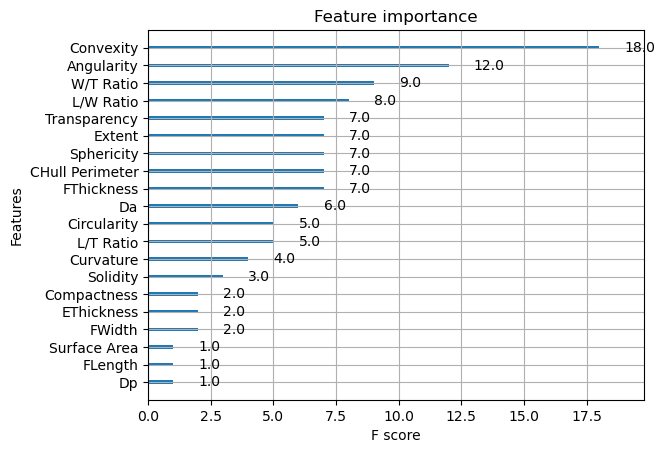

<Figure size 1600x1200 with 0 Axes>

In [ ]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                                          
0.9188679245283019                                                              
SCORE:                                                                          
0.9512578616352201                                                              
SCORE:                                                                          
0.9185534591194968                                                              
SCORE:                                                                          
0.9191823899371069                                                              
SCORE:                                                                          
0.9254716981132075                                                              
SCORE:                                                                          
0.9182389937106918                                                              
SCORE:                      

0.9238993710691824                                                              
SCORE:                                                                          
0.9374213836477987                                                              
SCORE:                                                                          
0.9223270440251572                                                              
SCORE:                                                                          
0.9522012578616352                                                              
SCORE:                                                                          
0.9207547169811321                                                              
SCORE:                                                                          
0.920440251572327                                                               
SCORE:                                                                          
0.9251572327044025          

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7619358152167299, 'gamma': 4.01546845595152, 'max_depth': 10.0, 'min_child_weight': 3.0, 'reg_alpha': 40.0, 'reg_lambda': 0.11775592304651311}


In [ ]:
params = {'colsample_bytree': 0.7619358152167299, 'gamma': 4.01546845595152, 
          'max_depth': 10, 'min_child_weight': 3, 
          'reg_alpha': 40, 'reg_lambda': 0.11775592304651311}

In [ ]:
xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.97,0.00,0.97,0.01
1,0.99,0.00,0.98,0.00
2,0.99,0.00,0.99,0.00
3,0.99,0.00,0.99,0.00
4,0.99,0.00,0.99,0.00
